<a href="https://colab.research.google.com/github/EMbeDS-education/ComputingDataAnalysisModeling20242025/blob/main/ISE/tagme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

You have to download the "token":

Download your access key from: https://sobigdata.d4science.org/web/tagme/tagme-help


In [ ]:
%%capture --no-stderr --no-display
# NBVAL_IGNORE_OUTPUT
%pip install secml

In [ ]:
import requests

TAGME_ENDPOINT = "https://tagme.d4science.org/tagme/tag"
LANG = "en"
KEY = "dc26fc51-fc11-44d2-b4d1-a025e64b4269-843339462" #please regenerate your key

In [ ]:
def query_tagme(text, long_text=False):
        payload = {"text": text, "gcube-token": KEY, "lang": LANG}
        if long_text:
                payload["long_text"] = 5
        r = requests.post(TAGME_ENDPOINT, payload)
        if r.status_code != 200:
                raise Exception("Error on text: {}\n{}".format(text, r.text))
        return r.json()


In [ ]:
query_tagme("Italy will not be competing in the 2022 world cup")


{'test': '5',
 'annotations': [{'spot': 'Italy',
   'start': 0,
   'link_probability': 0.4437723457813263,
   'rho': 0.4525856375694275,
   'end': 5,
   'id': 362466,
   'title': 'Italy national football team'},
  {'spot': 'will',
   'start': 6,
   'link_probability': 0.0036389119923114777,
   'rho': 0.06729841977357864,
   'end': 10,
   'id': 32828260,
   'title': 'Will (2011 film)'},
  {'spot': '2022 world cup',
   'start': 35,
   'link_probability': 0.3492063581943512,
   'rho': 0.3398236632347107,
   'end': 49,
   'id': 17742072,
   'title': '2022 FIFA World Cup'}],
 'time': 34,
 'api': 'tag',
 'lang': 'en',
 'timestamp': '2025-03-10T18:20:53'}

In [ ]:
# Try changing the min_rho parameter and see how it impacts the returned entities
def get_tagme_entities(tagme_response, min_rho=0.3):
    ann = tagme_response["annotations"]
    ann = [a for a in ann if a["rho"] > min_rho] # filter all the annotations with a rho score lower than the threshold
    return [a["title"] for a in ann if "title" in a] # return just the page titles

In [ ]:
get_tagme_entities(query_tagme("Italy will not be competing in the 2022 world cup"))

['Italy national football team', '2022 FIFA World Cup']

In [ ]:
text = "Leonardo da Vinci was an Italian Renaissance\
polymath whose areas of interest included invention,\
painting, sculpting, architecture, science, music, mathematics,\
engineering, literature, anatomy, geology, astronomy, botany, writing,\
history, and cartography. \nHe has been variously called the father \
of palaeontology, ichnology, and architecture, and is widely considered \
one of the greatest painters of all time. Leonardo is revered for his \
technological ingenuity. He conceptualised flying machines, a type of\
armoured fighting vehicle, concentrated solar power, an adding machine, and the double hull."


In [ ]:
# Try changing the min_rho parameter and see how it impacts the returned entities
def get_tagme_entities(tagme_response, min_rho=0.3):
    ann = tagme_response["annotations"]
    ann = [a for a in ann if a["rho"] > min_rho] # filter all the annotations with a rho score lower than the threshold
    return [a["title"] for a in ann if "title" in a] # return just the page titles

In [ ]:
print("BEFORE FILTERING")
resp = query_tagme(text, long_text=True)
before_filtering = [a["title"] for a in resp['annotations'] if "title" in a]
before_filtering

BEFORE FILTERING


['Leonardo da Vinci',
 'Leonardo da Vinci',
 'Italians',
 'Interest (emotion)',
 'Invention',
 'Painting',
 'Sculpture',
 'Architecture',
 'Science',
 'Music and mathematics',
 'Engineering',
 'Literature',
 'Anatomy',
 'Geology',
 'Astronomy',
 'Botany',
 'Writing',
 'History',
 'Cartography',
 'Clergy',
 'Paleontology',
 'Ichnology',
 'Architecture',
 'Neoplatonism',
 'Greatest!',
 'Painting',
 'Time (magazine)',
 'Leonardo da Vinci',
 'Canonization',
 'Technology',
 'Ingenuity',
 'Concept',
 'Flying Machines s.r.o.',
 'Stellar classification',
 'Stellar classification',
 'Combat vehicle',
 'Vehicle',
 'Concentrated solar power',
 'Adding machine',
 'Double hull']

In [ ]:
print("AFTER FILTERING")
after_filtering = get_tagme_entities(resp)
after_filtering

AFTER FILTERING


['Leonardo da Vinci',
 'Music and mathematics',
 'Geology',
 'Astronomy',
 'Botany',
 'Cartography',
 'Paleontology',
 'Ichnology',
 'Concentrated solar power',
 'Adding machine']

In [ ]:
print("The annotations that were filtered out are:")
[a for a in before_filtering if a not in after_filtering]

The annotations that were filtered out are:


['Italians',
 'Interest (emotion)',
 'Invention',
 'Painting',
 'Sculpture',
 'Architecture',
 'Science',
 'Engineering',
 'Literature',
 'Anatomy',
 'Writing',
 'History',
 'Clergy',
 'Architecture',
 'Neoplatonism',
 'Greatest!',
 'Painting',
 'Time (magazine)',
 'Canonization',
 'Technology',
 'Ingenuity',
 'Concept',
 'Flying Machines s.r.o.',
 'Stellar classification',
 'Stellar classification',
 'Combat vehicle',
 'Vehicle',
 'Double hull']

In [ ]:
# The URL where the relatedness is given
ENDPOINT_RELATEDNESS = "https://tagme.d4science.org/tagme/rel"

# In case I need efficiency I can do batch queries of 100 couples per HTTP call
def query_relatedness(e1, e2):
    # Entities require underscores in-place of the spaces. The space is between entity one and entity two
    tt = e1.replace(" ", "_") + " " + e2.replace(" ", "_")
    payload = {"tt": tt, "gcube-token": KEY, "lang": LANG}
    r = requests.post(ENDPOINT_RELATEDNESS, payload)
    if r.status_code != 200:
        raise Exception("Error on relatedness computation: {}\n{}".format(tt, r.text))
    return r.json()

In [ ]:
#TagME has an internal relatedness computation framework, so I can ask TagME itself how close
# two entities are to one another. This metric is computed directly on the Wikipedia Knowledge Graph.

first = query_relatedness("Biology", "Biotechnology")
print(first['result'])

second = query_relatedness("Barack Obama", "Biotechnology")
print(second['result'])

thirds = query_relatedness("Barack Obama", "Biology")
print(thirds['result'])

print(first)

[{'couple': 'Biology Biotechnology', 'rel': 0.6070536971092224}]
[{'couple': 'Barack_Obama Biotechnology', 'rel': 0.23863035440444946}]
[{'couple': 'Barack_Obama Biology', 'rel': 0.16491788625717163}]
{'result': [{'couple': 'Biology Biotechnology', 'rel': 0.6070536971092224}], 'api': 'rel', 'lang': 'en', 'errors': 0, 'timestamp': '2025-03-10T18:37:43'}


In [ ]:
!pip install wordcloud

from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_tag_cloud(freq, image_filename=None):
	wc = WordCloud(background_color="white").generate_from_frequencies(freq)
	if image_filename:
        # If you pass it a filename, then it saves the image on the provided path
		image = wc.to_image()
		image.save(image_filename)
	else:
        # then it just displays it here on the notebook
		plt.imshow(wc, interpolation='bilinear')
		plt.axis("off")
		plt.show()

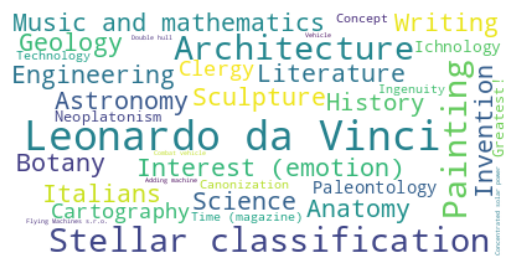

In [ ]:
c_before = Counter(before_filtering)
generate_tag_cloud(c_before)


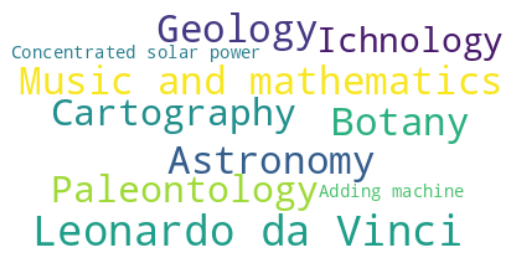

In [ ]:
c_after = Counter(after_filtering)
generate_tag_cloud(c_after)